## Test of accelerated Monte Carlo ##

In [1]:
from particle import particle
from physics import em_physics
from cylinder import cylinder

import matplotlib.pyplot as plt
import numpy as np
from numba import jit
import pandas as pd

%matplotlib inline

### Define the Geometry ###

In [2]:
# define the geometry
radius = 50 # cm
height = 100 #cm
cryostat = cylinder(R=radius,h=height)

radius = 40 # cm
height = 80 #cm
fiducial = cylinder(R=radius,h=height)

cylinder::__init__ Define cylinder with R= 50  and height= 100
cylinder::__init__ Define cylinder with R= 40  and height= 80


### Setup the photon physics ###

In [3]:
# define the physics
em = em_physics()

### Event generation ###

In [10]:
nevent = 100000
energy = 1000 # keV

edep = []
nint = []
x = []
y = []
z = []

for ieve in range(nevent):
    if ieve%10000 == 0:
        print("generated ",ieve," events")
    # make a particle
    p = particle(type='gamma',energy=energy, geometry=cryostat, fiducial=fiducial, physics=em)
    # propogate the particle and retrieve the intersection points
    p.propagate()
    # plots
    nint.append(p.nscatter)
    if p.nscatter > 0:
        edep.append(p.edep)
    for i in range(len(p.xint)):
        if p.edep < 250:
            x.append(p.xint[i][0][0])
            y.append(p.xint[i][0][1])
            z.append(p.xint[i][0][2])

generated  0  events
generated  10000  events
generated  20000  events
generated  30000  events
generated  40000  events
generated  50000  events
generated  60000  events
generated  70000  events
generated  80000  events
generated  90000  events


### Plotting ###

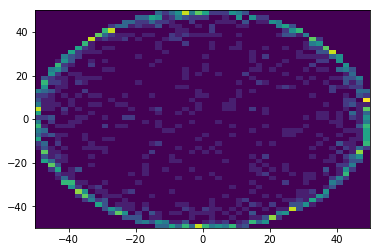

In [11]:
h=plt.hist2d(x,y,bins=(50,50))

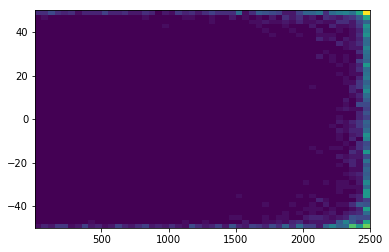

In [13]:
r2 = np.array(x)**2+np.array(y)**2
h2 = plt.hist2d(r2,z,bins=(50,50))

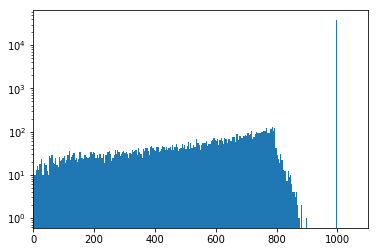

In [14]:
h=plt.hist(edep,bins=250)
plt.xlim([0,1100])
ax = plt.gca()
ax.set_yscale('log')

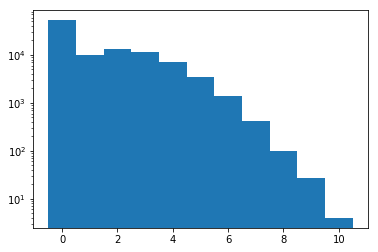

In [15]:
h=plt.hist(nint,bins=11,range=(-0.5,10.5))
ax = plt.gca()
ax.set_yscale('log')